In [4]:
import pymysql as db
import argparse
import pandas as pd
from pytrends.request import TrendReq

In [5]:
a= ['Diesel', 'Dolce & Gabbana', 'Nike']

a

['Diesel', 'Dolce & Gabbana', 'Nike']

In [6]:
pytrends = TrendReq(hl='en-US')
pytrends.build_payload(kw_list=a, cat=0, geo='',timeframe='all' ,gprop='')
df = pytrends.interest_over_time()
df = df.drop(columns=['isPartial'])
df1 = df.copy()
df1.reset_index(level=0, inplace=True)
pd.melt(df1, id_vars='date', value_vars=a)


,date,variable,value
0,2004-01-01,Diesel,25
1,2004-02-01,Diesel,24
2,2004-03-01,Diesel,25
3,2004-04-01,Diesel,26
4,2004-05-01,Diesel,28
...,...,...,...
592,2020-03-01,Nike,70
593,2020-04-01,Nike,73
594,2020-05-01,Nike,91
595,2020-06-01,Nike,87


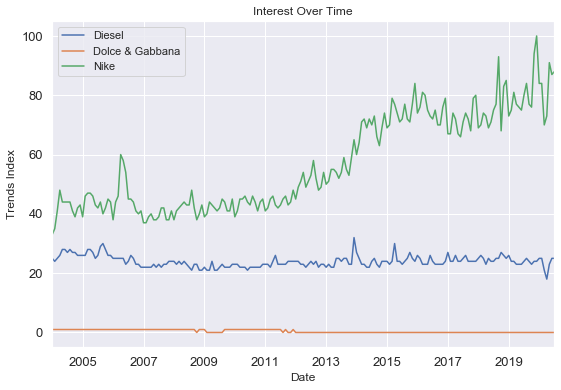

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)
dx = df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

In [54]:
#looks at related keyword trends for the keywords 
pytrends.build_payload(kw_list=a, geo = 'US', timeframe = 'today 3-m', cat = 44)
related_queries= pytrends.related_queries()


{'Diesel': {'top':                            query  value
  0                     vin diesel    100
  1              diesel barbershop     77
  2           vin diesel with hair     26
  3                 diesel fitness     14
  4  diesel barbershop san antonio     12
  5          diesel only the brave      9,
  'rising':                            query  value
  0  diesel barbershop san antonio  94350},
 'Dolce & Gabbana': {'top':                                 query  value
  0          dolce & gabbana light blue    100
  1             dolce & gabbana perfume     60
  2                   dolce and gabbana     58
  3             dolce & gabbana cologne     38
  4             dolce & gabbana the one     36
  5  dolce & gabbana light blue for men     28
  6                k by dolce & gabbana      9,
  'rising':                                 query  value
  0  dolce & gabbana light blue for men     80
  1             dolce & gabbana the one     70},
 'Nike': {'top':                   q

In [68]:
pd.DataFrame(related_queries)

,Diesel,Dolce & Gabbana,Nike
top,query value 0 ...,query value 0...,query value 0 ni...
rising,query value 0 die...,query value 0...,query value 0 ...


In [7]:
#!/usr/bin/env python3
"""
create a function to put a list of keywords from csv and output a list of google trends 
"""

INFILE = r"C:\Users\Documents\GoogleTrendsPython\brands.csv" ## The r"" syntax is to escape characters in order to remove errors
OUTFILE = r"C:\Users\Documents\GoogleTrendsPython\test.csv"
COLUMN_NAME = "brand" ## It's "Company" in the `sample_keywords_list.csv` file

# Sample Data
# INFILE = r"C:\Users\user\Documents\sample_keywords_list.csv"
# OUTFILE = r"C:\Users\user\Documents\awesome_results.csv"
# COLUMN_NAME = "Company"

import pandas as pd
from pytrends.request import TrendReq

def get_google_trends_data(KEYWORDS, out_filename=None):

    pytrends.build_payload(KEYWORDS, cat=0, geo='US',timeframe='all' ,gprop='')

    df = pytrends.interest_over_time()

    if not df.columns.any():
        raise Exception("Keyword `{kw}` not present in Google Trends".format(kw=KEYWORDS[0]))
    if 'isPartial' in df.columns:
        df = df.drop(columns=['isPartial'])

    ofname = out_filename
    if ofname:
        if not ofname.endswith('.csv'):
            ofname = ofname + '.csv'
            df.to_csv(ofname)
    else:
        ofname = "Google Trends Results.csv"
        df.to_csv(ofname)
    return ofname


if __name__ == "__main__":

    df = brands
    COLUMN_TO_BE_USED = COLUMN_NAME
    keywords = None
    if COLUMN_TO_BE_USED in df.columns and len(df[COLUMN_TO_BE_USED]) > 0:
        keywords = list(df[COLUMN_TO_BE_USED])
    else:
        raise Exception("`{col}` not present in input CSV file: {f}".format(col=COLUMN_TO_BE_USED, f=INFILE))
    try:
        print("Setting up Google instance...")
        pytrends = TrendReq(hl='en-US')
        res_file = get_google_trends_data(keywords, out_filename=OUTFILE)
        if res_file:
            print("Successfully stored Google Trend results in `{rf}` for {kw}".format(kw=keywords, rf=res_file))

    except Exception as e:
        print("Something unexpected has occured. Please find the error below...")
        print("Error: ", e)

Setting up Google instance...
Successfully stored Google Trend results in `C:\Users\punith.kesarkar\Documents\GoogleTrendsPython\test.csv` for ['Diesel', 'Dolce & Gabbana', 'Nike']
